<a href="https://colab.research.google.com/github/adilrahman/Restaurant-Rating-Prediction/blob/main/Restaurant_Rating_EDA_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Dataset

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv *.json kaggle.json
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (2).json to kaggle (2).json


In [ ]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 98% 87.0M/89.0M [00:01<00:00, 78.7MB/s]
100% 89.0M/89.0M [00:01<00:00, 60.0MB/s]


In [ ]:
!unzip *.zip

Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


# EDA 

### Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Analysis

In [ ]:
df = pd.read_csv("zomato.csv")
df.head()

In [ ]:
drop_cols = ["url","address","phone"]

In [ ]:
df.drop(drop_cols,inplace = True, axis = 1)
df.head(2)

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

In [ ]:
df.info()

Observations:
  * name => is a nominal data
  * online_order => should convert into [yes => 1, no => 0]
  * book_table => should convert into [yes => 1, no => 0]
  * dish_liked => dishes people liked in that rest. 
      * so we don't actually required this for predictive model [we can drop this]
  * rate -> contain null values should impute

In [ ]:
### check null values

def null_values_percentage(df):
  total_count = df.shape[0]
  print(f"-------------------> {total_count} [records] <-------------\n")
  for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{null_count/total_count*100:0.3f}% \t:\t {col}")

null_values_percentage(df)

Observation:
  * dish_liked :- contain 54% null values
  * rate       :- contain 15% null values
  * location, rest_type, cuisines, approx_cost also contain null values but small amount ( total 1% )
    * but these features are importent in prediction of a restaurant rating so we can drop the null rows

In [ ]:
drop_null_rows = ["location", "rest_type", "cuisines", "approx_cost(for two people)"]
df = df.dropna(subset = drop_null_rows,axis = 0)
null_values_percentage(df)

### fixing rate null values 

In [ ]:
df["rate"].unique()

In [ ]:
import missingno as msno

# converting NEW and '-' values into null value 
def convert(x):
  if x in ["NEW","-"]:
    return np.nan
  return x

df["rate"] = df["rate"].apply(convert)
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()

In [ ]:
df = df.dropna(subset = ["rate"])
plt.figure(figsize = (1,5))
msno.bar(df)
plt.show()

### Convert dtypes

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
## convert rating values into numerical format
df["rate"] = df["rate"].str.split("/").str[0].astype(float)
df["rate"]

In [ ]:
## convert approx_cost values into numerical format
df["approx_cost(for two people)"].unique()

In [ ]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].str.replace(",","").astype(float)

In [ ]:
## convert online_order and book_table into numerical ordinal format
df["online_order"].unique()

In [ ]:
df["book_table"].unique()

In [ ]:
df["book_table"]   = df["book_table"].map({"Yes" : 1 , "No" : 0})
df["online_order"] = df["online_order"].map({"Yes" : 1 , "No" : 0})

In [ ]:
df.dtypes

### Visualization

In [ ]:
df.head()

In [ ]:
fig1, (ax1 , ax2) = plt.subplots(1,2)

sns.countplot(data = df, x = "online_order", ax=ax1)

labels = ["Yes",'No']
values = df['online_order'].value_counts().values
colors = ['green', 'blue']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Online order')
plt.show()

In [ ]:
## checking is there any relationship b\w online order and rating 
sns.displot(data = df, x="rate", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "rate", x ="online_order")

In [ ]:
sns.displot(data = df, x="approx_cost(for two people)", hue ="online_order",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="online_order")

Observation:
  * most of the restarents in bagloor provide online orders

In [ ]:
fig1, (ax1 , ax2) = plt.subplots(1,2)

sns.countplot(data = df, x = "book_table", ax=ax1)

labels = ["Yes",'No']
values = df['book_table'].value_counts().values
colors = ['green', 'blue']
ax2.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Online order')
plt.show()

In [ ]:
# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="rate", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "rate", x ="book_table")


In [ ]:


# fig1, (ax1 , ax2) = plt.subplots(1,2)
sns.displot(data = df, x="approx_cost(for two people)", hue ="book_table",fill=True,height=5, aspect=1.5, kind="kde",palette=sns.color_palette('bright')[:2])
plt.show()
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "approx_cost(for two people)", x ="book_table")


Observation:
  * most of the restarent in bagloor are not providing table booking service

In [ ]:
## price and rating relationship
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
# sns.boxplot(data = df[df["rate"] < 2.0], y = "approx_cost(for two people)")
test_df = df
test_df = test_df.sort_values(by=['rate'], ascending=False)
test_df.head()
test_df.dtypes
def transform(x):
  if x <= 2.0:
    return "x <= 2.0"
  if x <= 3.0:
    return "2.0 < x <= 3.0"
  if x <= 4.0:
    return "3.0 < x <= 4.0"
  if x <= 4.5:
    return "4.0 < x <= 4.5"
  else:
    return "4.5 < x <= 5.0"

test_df["new_rate"] = test_df["rate"].apply(transform)

sns.boxplot(data = test_df, y = "approx_cost(for two people)", x ="new_rate")

In [ ]:
## mean cost values 
for val in test_df["new_rate"].unique():
  rows = test_df[test_df["new_rate"] == val]
  mean_cost = rows["approx_cost(for two people)"].median()
  print(f"{mean_cost:.2f}  \t: \t  {val} [{len(rows)}] ")

Observation

In [ ]:
test_df.groupby("new_rate","")

In [ ]:
###
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest type')

In [ ]:

### most rest locations
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title('rest locaiton wise count')

In [ ]:
df["location"].value_counts()[:10]

Obeservations:
  - **most rest location in banglure** 
    1. BTM                      
    1. Koramangala 5th Block    
    1. HSR                      
    1. Indiranagar              
    1. JP Nagar                 
    1. Jayanagar                
    1. Whitefield               
    1. Marathahalli             
    1. Bannerghatta Road        
    1. Koramangala 7th Block    

In [ ]:
df["rest_type"].value_counts()[:31]

In [ ]:
df["rest_type"].value_counts()
cols = df["rest_type"].value_counts()[:10].index
def convert(x):
  if x in cols:
    return x
  else:
    return "other"


df["type"] = df["rest_type"].apply(convert)

In [ ]:
## we only took top 30 rest_type others are making as "other catagory"
cols = df["rest_type"].value_counts()[:31].index
df["rest_type"] = df["rest_type"].apply(convert)

In [ ]:
plt.figure(figsize = (20,10))
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [ ]:
sns.boxplot(data = df, y="rate", x="type").set(title = "Type - Rating")

Observations:
  * most of the casual dining and quick bites having rating mean between 3.2 and 4.0
  * 

In [ ]:
plt.figure(figsize = (20,10))
plt.rcParams["figure.figsize"] = (30,10)
type_plt=pd.crosstab(df['approx_cost(for two people)'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - approx_cost(for two people)',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Cost',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [ ]:
import plotly.express as px

In [ ]:
# sns.boxplot(data = df, y="approx_cost(for two people)", x="type").set(title = "Type - approx_cost(for two people)")
# df = px.data.tips()
fig = px.box(df, y="approx_cost(for two people)", x="type")
fig.show()

Observation:
  * approx_cost for two people in casual dining is around 600-900
  * approx_cost for two people in quick bites is around 200-400
  * approx_cost for two people in cafe  is around 500-800
  * number of bar having less than 1000 approx_cost for two people in banglur is very rare
  * number of cafes having greater than 1000 approx_cost for two people in banglur is very rare ( cost 400-850 )


In [ ]:
### most famous rest in Bangaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Observations:
  * most famous rest chain in bangaluru are
    1. Cafe Coffe Day
    2. Onesta
    3. 
    4. 
    5. 

### WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

In [ ]:
df_cp = df.copy()
df_cp.dropna(subset = ["dish_liked"],inplace=True)
print("no:of null values in dish_liked ==>",df_cp["dish_liked"].isnull().sum())

In [ ]:
x = lambda x : x.split(",") if type(x) == str else [""]
df_cp["dish_liked"] = df_cp["dish_liked"].apply(x)
df_cp.head(3)

In [ ]:
#create word cloud
def create_word_cloud(rest_type):
  # plt.title("word cloud of liked dishes in 9 type restarent")
  plt.figure(figsize = (20,30))
 
  for i,rest in enumerate(rest_type):
    dishes = ""
    plt.subplot(3,3,i+1)
    data = df_cp[df_cp["rest_type"] == rest]
    for words in data["dish_liked"]:
      tmp = []
      for word in words:
        tmp.append(word.lower())
      dishes += " ".join(tmp) + " "
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(dishes)  
    plt.imshow(wordcloud)
    plt.title(rest)

In [ ]:
rest_types = df_cp["rest_type"].value_counts()[:9].index
create_word_cloud(rest_types)

Observation:
Top 3 cuisines in banglure of 9 rest
1. **Casual Dining** 
  - North indian
  - Chinese
  - South indian
1. **Quick Bites** 
  - North indian
  - Chinese
  - South indian

1. **Cafe** 
  - North indian
  - Chinese
  - South indian

1. **Dessert Parlor** 
  - North indian
  - Chinese
  - South indian

1. **Casual Dining, Bar** 
  - North indian
  - Chinese
  - South indian



In [ ]:
#most provided cuisines in bangluru
def word_cloud_cuisines(data):
  cuisines = ""
  for cu in data:
    cuisines +=  " " + cu + " "
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, width = 1200, height = 1200).generate(cuisines)  
  plt.imshow(wordcloud)
  plt.title("most provided cuisines in bangluru")

word_cloud_cuisines(df["cuisines"].str.replace(" ","_").str.replace(",_", " "))

Observation:
Top 3 cuisines in banglure
  1. North indian
  2. Chinese
  3. South indian

# Feature Engineering 

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Casual Dining
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Casual Dining
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,"Casual Dining, Bar"
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,"Casual Dining, Bar"
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,Bar
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Bar


In [ ]:
drop_cols = ["name","rest_type","votes","dish_liked", "reviews_list", "menu_item", "location", "listed_in(city)"]

In [ ]:
df.drop(drop_cols, axis = 1,inplace = True)
df

,online_order,book_table,rate,cuisines,approx_cost(for two people),listed_in(type),type
0,1,1,4.1,"North Indian, Mughlai, Chinese",800.0,Buffet,Casual Dining
1,1,0,4.1,"Chinese, North Indian, Thai",800.0,Buffet,Casual Dining
2,1,0,3.8,"Cafe, Mexican, Italian",800.0,Buffet,other
3,0,0,3.7,"South Indian, North Indian",300.0,Buffet,Quick Bites
4,0,0,3.8,"North Indian, Rajasthani",600.0,Buffet,Casual Dining
...,...,...,...,...,...,...,...
51709,0,0,3.7,"North Indian, Continental",800.0,Pubs and bars,"Casual Dining, Bar"
51711,0,0,2.5,"Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,"Casual Dining, Bar"
51712,0,0,3.6,Continental,1500.0,Pubs and bars,Bar
51715,0,1,4.3,Finger Food,2500.0,Pubs and bars,Bar


In [ ]:
df["cuisines"] = df["cuisines"].str.lower()

In [ ]:
df["cuisines"][0]

'north indian, mughlai, chinese'

In [ ]:
# x = lambda x: ", ".join(x)
# df["cuisines"] = df["cuisines"].apply(x)
cols = df["cuisines"].value_counts()[:20].index

def convert(x):
  if x in cols:
    return x
  return "other"

df["cuisines"] = df["cuisines"].apply(convert)

In [ ]:
df["type"].unique()

array(['Casual Dining', 'other', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery', 'Beverage Shop',
       'Bar', 'Casual Dining, Bar'], dtype=object)

In [ ]:
df["cuisines"].unique()

array(['other', 'south indian, north indian', 'north indian', 'cafe',
       'bakery, desserts', 'biryani', 'south indian',
       'north indian, chinese', 'ice cream, desserts',
       'desserts, beverages', 'chinese', 'bakery', 'fast food',
       'mithai, street food', 'desserts',
       'south indian, north indian, chinese', 'chinese, north indian',
       'desserts, ice cream', 'finger food', 'chinese, momos',
       'north indian, chinese, biryani'], dtype=object)

In [ ]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["rate"], axis =1)
y = df["rate"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1337)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((32980, 6), (8246, 6), (32980,), (8246,))

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

type_transform = LabelEncoder()
cuisines_transform = LabelEncoder()
listed_in_type_transform = LabelEncoder()

In [ ]:
X_train["type"] = type_transform.fit_transform(X_train["type"])
X_train["cuisines"] = cuisines_transform.fit_transform(X_train["cuisines"])
X_train["listed_in(type)"] = listed_in_type_transform.fit_transform(X_train["listed_in(type)"])

In [ ]:
X_test["cuisines"].reshape(-1)

AttributeError: ignored

In [ ]:
X_test["type"] = type_transform.transform(X_test["type"])
X_test["cuisines"] = cuisines_transform.transform(X_test["cuisines"])
X_test["listed_in(type)"] = listed_in_city_transform.transform(X_test["listed_in(type)"])

**normalize features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cuisines_norm = MinMaxScaler()
approx_cost_norm = MinMaxScaler()
listed_in_norm = MinMaxScaler()
type_norm = MinMaxScaler()


In [ ]:
X_train["cuisines"] = cuisines_norm.fit_transform(X_train["cuisines"])
X_train["approx_cost(for two people)"] = approx_cost_norm.fit_transform(X_train["approx_cost(for two people)"])
X_train["listed_in(type)"] = listed_in_norm.fit_transform(X_train["listed_in(type)"])
X_train["type"] = type_norm.fit_transform(X_train["type"])

ValueError: ignored

,online_order,book_table,cuisines,approx_cost(for two people),listed_in(type),type
8615,1,0,14,500.0,2,4
29303,0,0,17,900.0,1,10
2779,1,0,17,250.0,2,10
21109,1,0,17,750.0,4,4
44380,1,0,17,700.0,3,3
...,...,...,...,...,...,...
27770,1,0,17,300.0,2,9
24829,1,0,17,350.0,4,8
11847,1,0,17,500.0,2,3
42253,1,0,3,300.0,1,3


In [ ]:
X_test

,online_order,book_table,cuisines,approx_cost(for two people),listed_in(type),type
12147,1,0,7,400.0,2,7
36031,0,0,17,550.0,2,4
14635,1,0,17,800.0,1,3
48336,0,0,14,300.0,4,10
24003,1,0,4,700.0,2,10
...,...,...,...,...,...,...
29882,1,1,4,1100.0,2,4
30619,0,0,17,300.0,2,6
21035,0,1,17,1100.0,4,4
24627,0,0,17,350.0,3,10


Base model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
def base_model_evaluation(X_train,y_train,X_test,y_test):
  base_model = LinearRegression()
  base_model.fit(X_train, y_train)
  score = base_model.score(X_test,y_test)
  y_pred = base_model.predict(X_test)
  mse = MSE(y_test, y_pred)
  rmse = np.sqrt(MSE(y_test, y_pred))
  mae = MAE(y_test, y_pred)
  r2 = R2(y_test, y_pred)
  print(f"score => {score}\nmse => {mse}\nrmse => {rmse}\nmae => {mae}\nr2 => {r2}")
  plt.title("prediction vs actual values")
  plt.scatter(x = range(0,y_test.shape[0]),y = y_pred - y_test)
  plt.plot([0]*y_test.shape[0],c = "r", linewidth = '5.5')
  plt.show()
  

score => 0.2182630863043893
mse => 0.1517876024655553
rmse => 0.389599284477725
mae => 0.3049896175393879
r2 => 0.2182630863043893


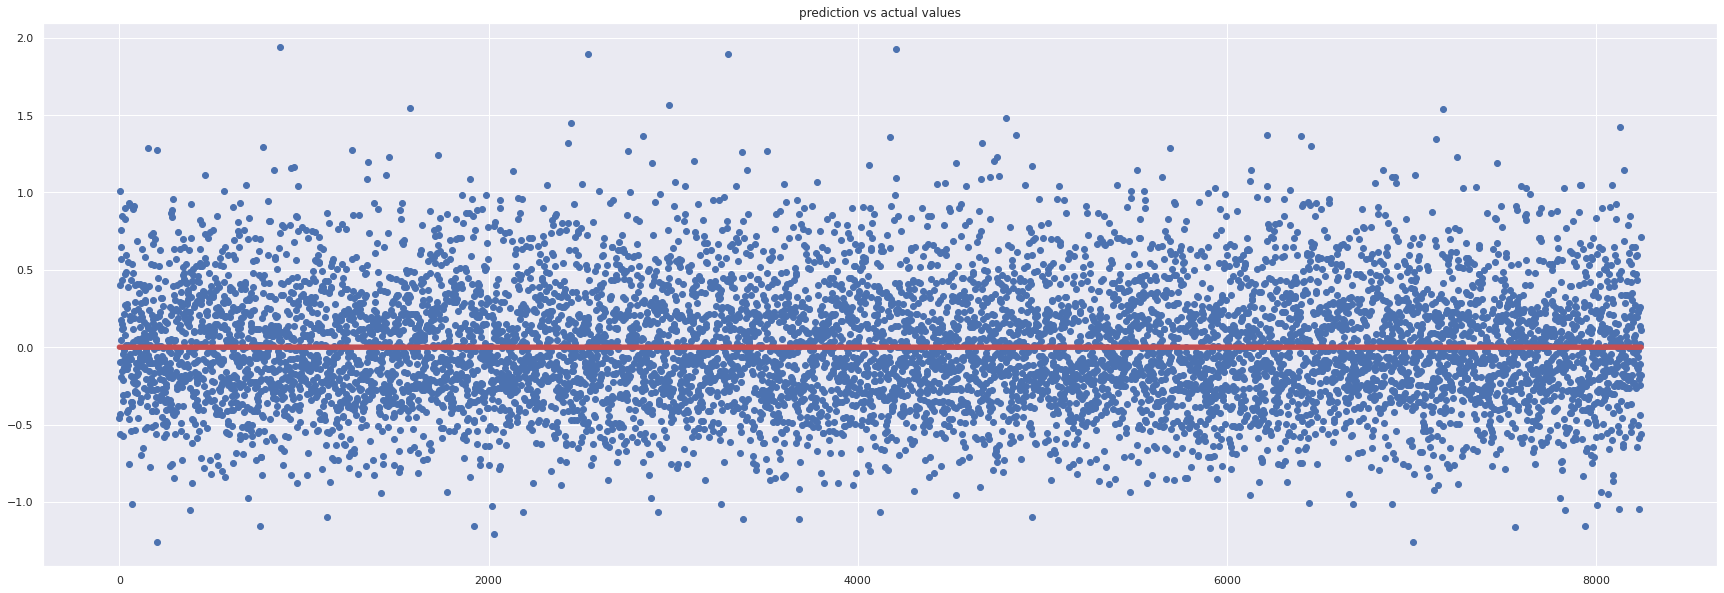

In [ ]:
base_model_evaluation(X_train,y_train,X_test,y_test)

### Data Correaltions 

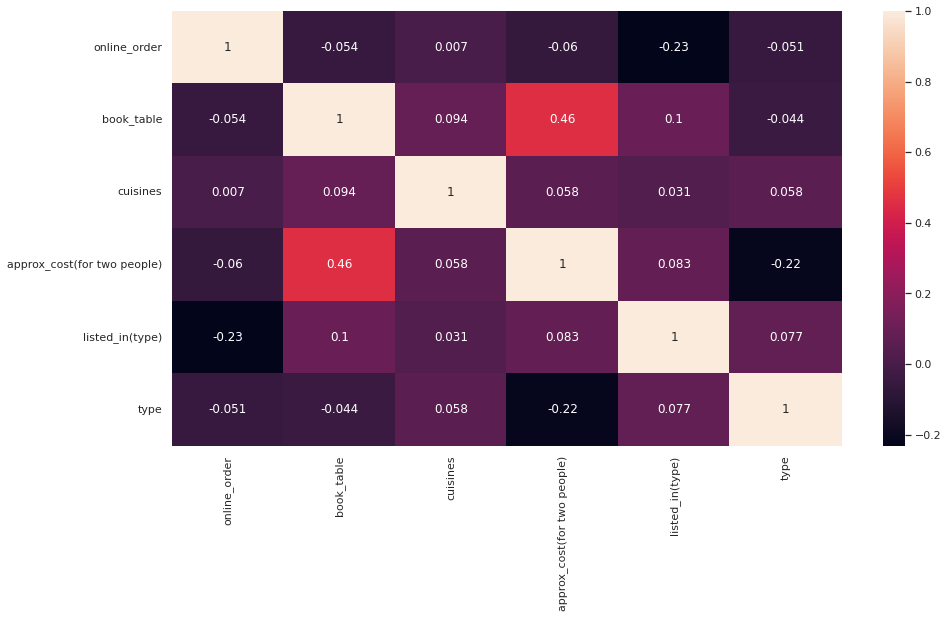

In [ ]:
#Get Correlation between different variables
corr = X_train.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
# df.columns